In [5]:
from power_spectrum import *
%matplotlib inline

In [6]:
nsims_train = 10**5
nsims_test = 10**3

p_train = rand(nsims_train,2)
p_test = rand(nsims_test, 2)

batch_size = 32

def spectral_index(params):
    def f(k):
        if k==0:
            return zeros(len(params))
        return k**(-4*params)
    return f

sims = lambda p: standardise_ps(fast_gaussian(spectral_index(p[:,0]), fnl=10.**(6*p[:,1]-3)), lambda x: 1,ps=True)

In [9]:
from ipywidgets import interactive

interactive(lambda spec_ind, f_nl: plot_2d_field(sims(np.array([[spec_ind,f_nl]]))[0][0]), spec_ind=(0.,1.), f_nl=(0.,1))

interactive(children=(FloatSlider(value=0.5, description='spec_ind', max=1.0), FloatSlider(value=0.5, descript…

In [8]:
import time

start = time.time()

x_train,edges,ps_train = sims(p_train)
x_test,edges,ps_test = sims(p_test)

time.time()-start

/global/u2/a/avirukt/proj/power_spectrum.py:159: RuntimeWarning: invalid value encountered in true_divide
  field /= k2
/global/u2/a/avirukt/proj/power_spectrum.py:321: RuntimeWarning: divide by zero encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:321: RuntimeWarning: invalid value encountered in multiply
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:159: RuntimeWarning: invalid value encountered in true_divide
  field /= k2
/global/u2/a/avirukt/proj/power_spectrum.py:321: RuntimeWarning: divide by zero encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:321: RuntimeWarning: invalid value encountered in multiply
  x *= sqrt(new/current)


30.673979997634888

In [5]:
pretrained_model = LFI(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnl3')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnl3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aaaef0ef240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
post = pretrained_model.plot_posteriors(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


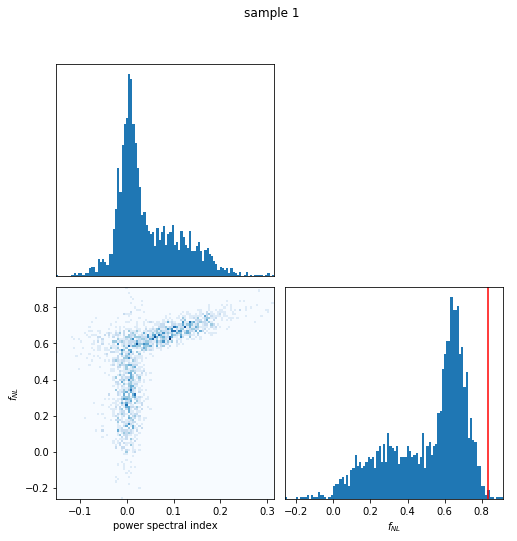

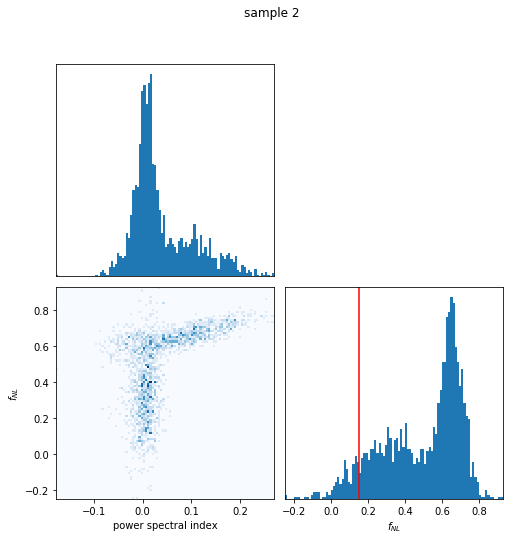

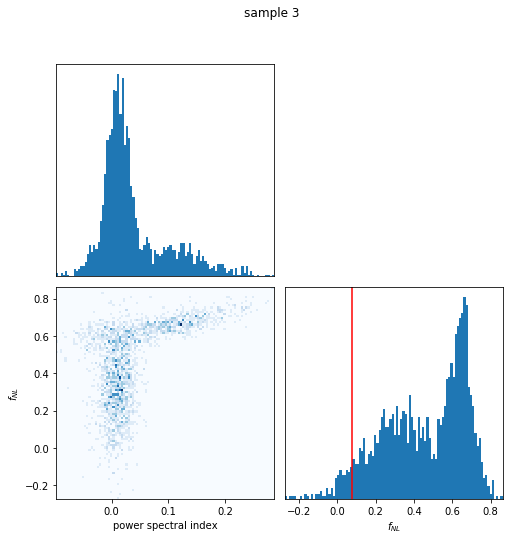

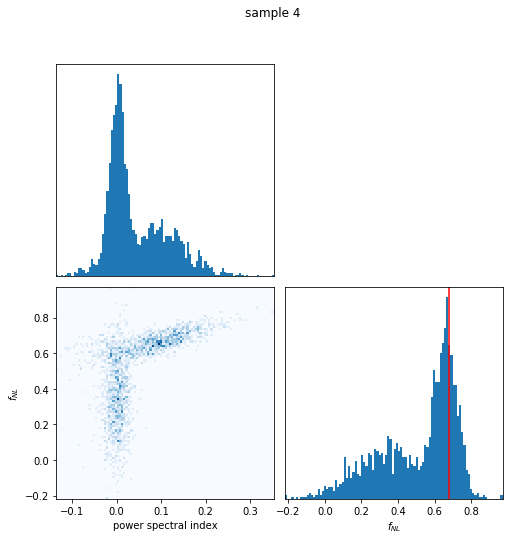

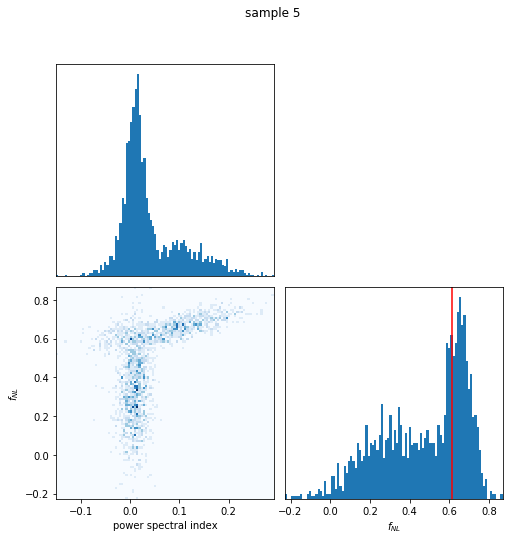

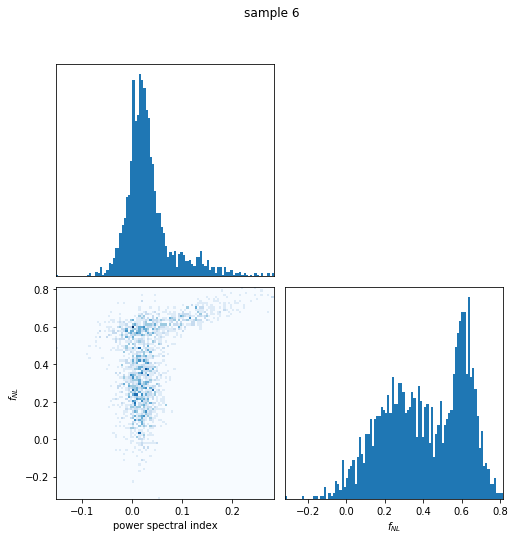

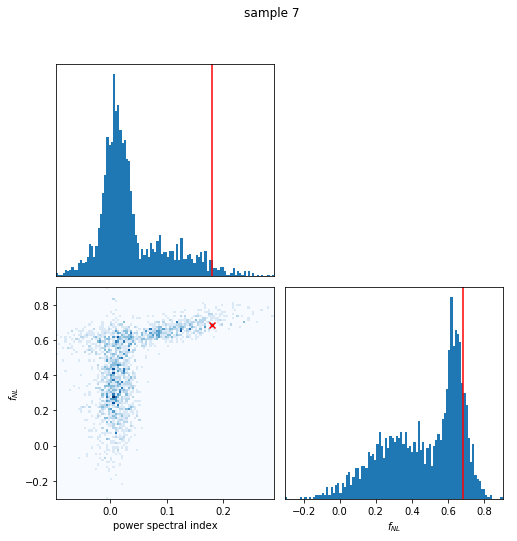

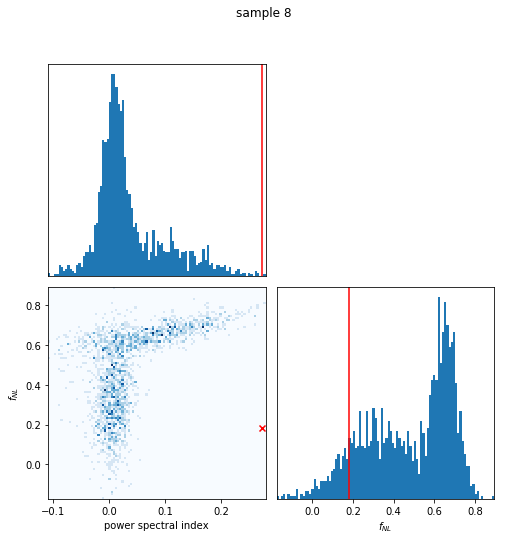

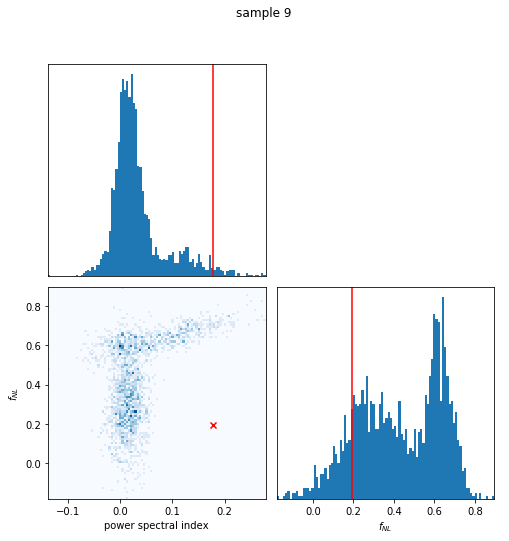

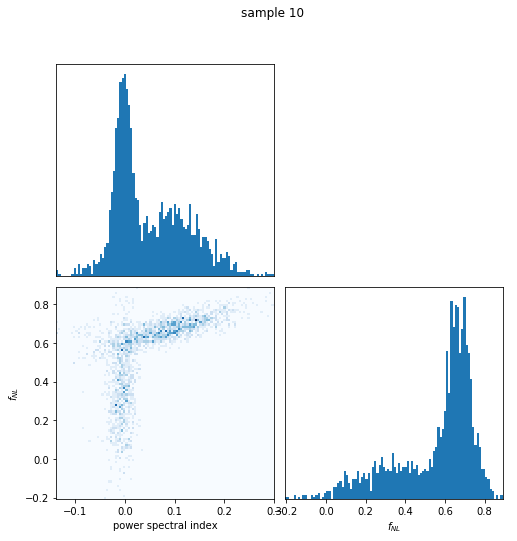

In [7]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


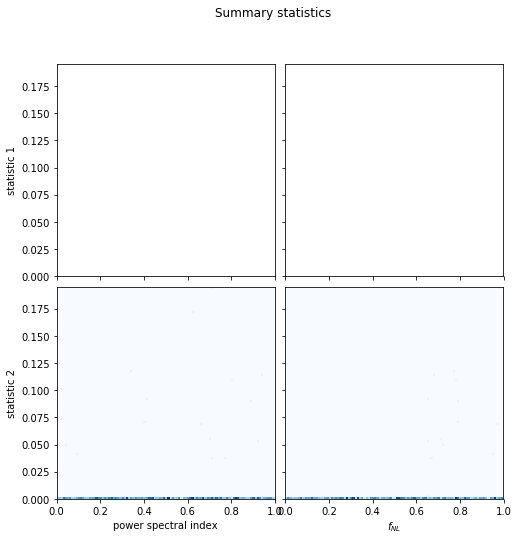

In [8]:
pretrained_model.plot_summaries(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


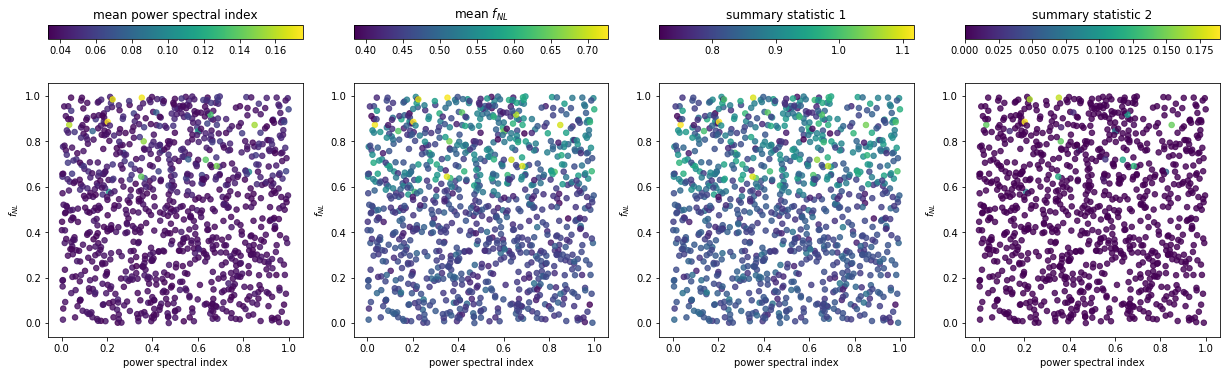

In [6]:
pretrained_model.plot_2d(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


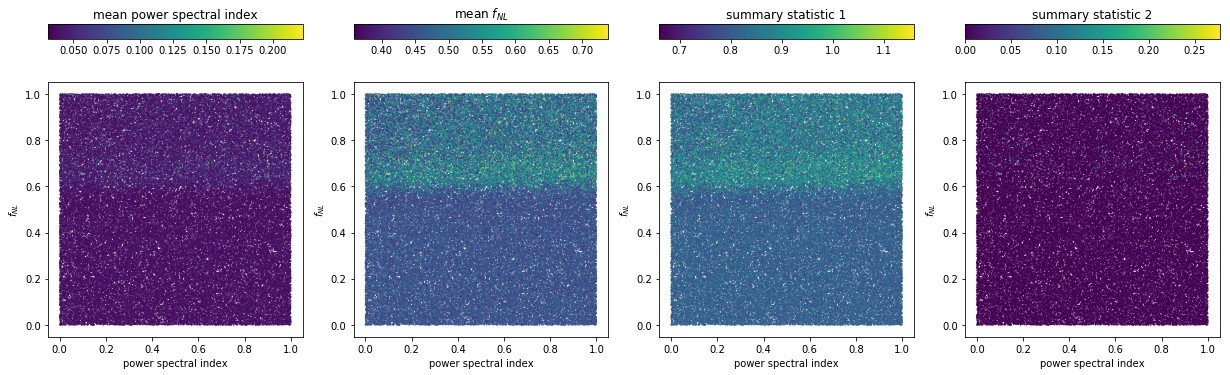

In [7]:
pretrained_model.plot_2d(x_train,p_train)

In [11]:
from ipywidgets import interact_manual

def posteriors(n,spec_ind,f_nl):
    p = array([(spec_ind,f_nl)]*n)
    x = sims(p)
    for g in pretrained_model.plot_posteriors(x,p):
        pass

interact_manual(posteriors, n=(1,10), spec_ind=(0,1,0.01), f_nl=(0,1,0.01))

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), FloatSlider(value=0.0, description='…

<function __main__.posteriors(n, spec_ind, f_nl)>

In [13]:
model = LFI(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnls2')
batch_size=512
model.train(training_fn_generator(x_train, p_train, batch_size=batch_size), max_steps=20*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnls2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aaaf0c4fe80>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Skipping training since max_steps has already saved.


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls2/model.ckpt-3906
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


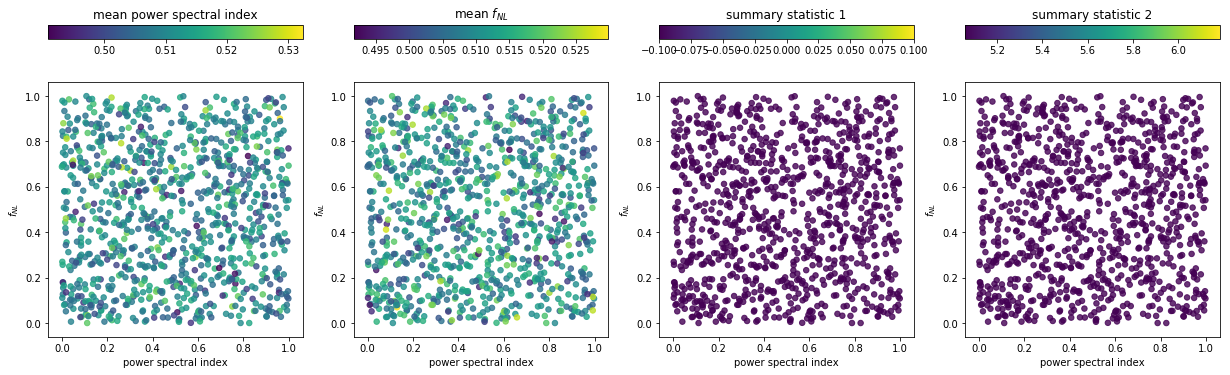

In [14]:
model.plot_2d(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


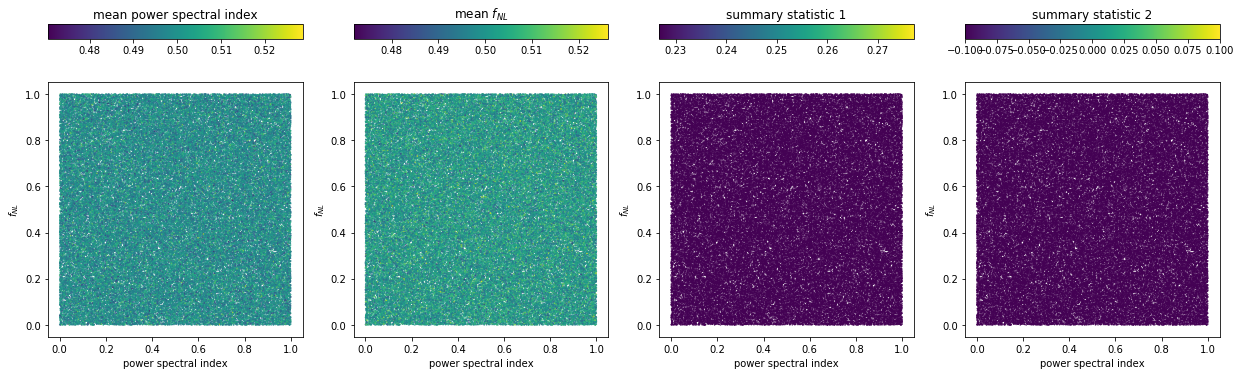

In [10]:
model.plot_2d(x_train,p_train)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


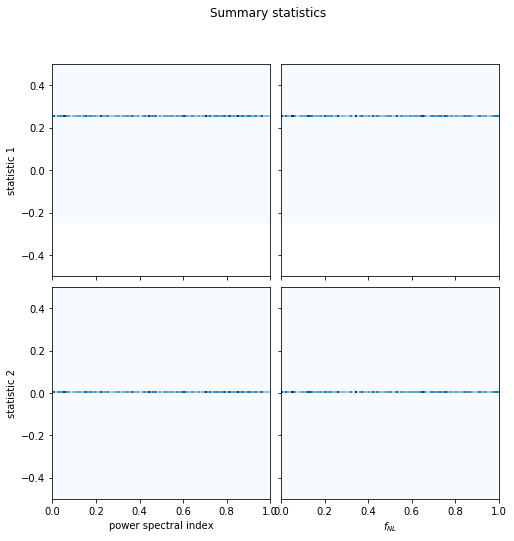

In [11]:
model.plot_summaries(x_test,p_test)

In [13]:
post = model.plot_posteriors(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


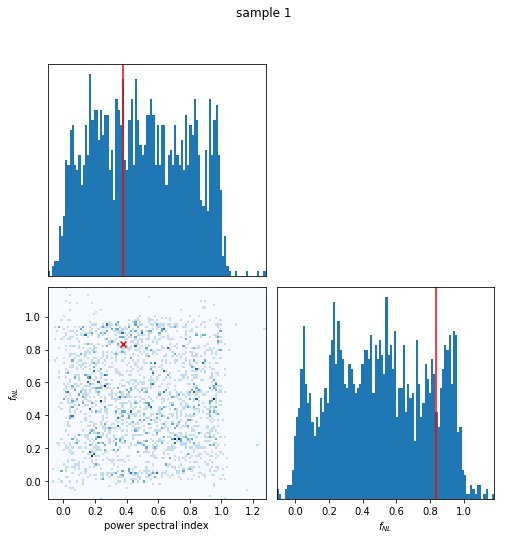

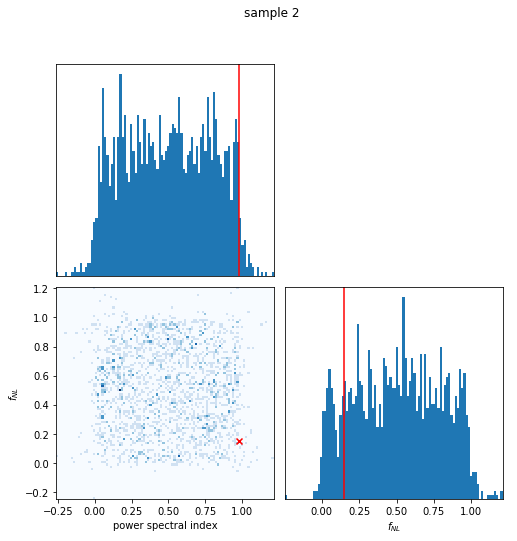

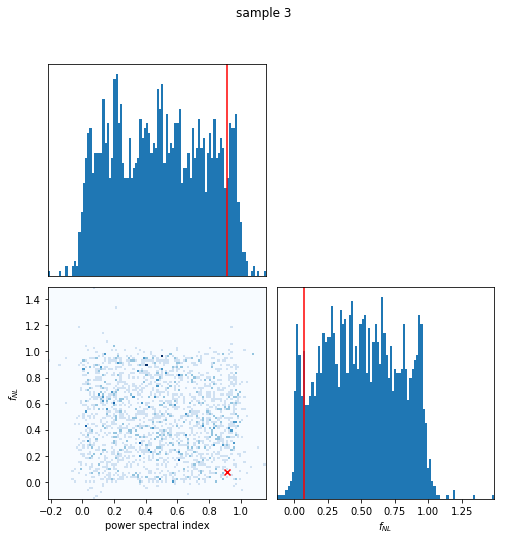

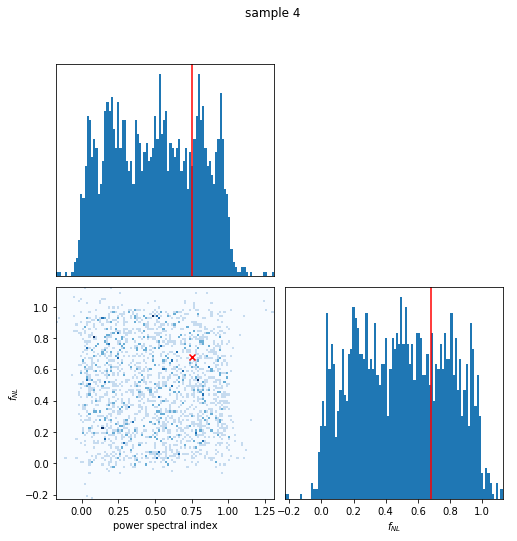

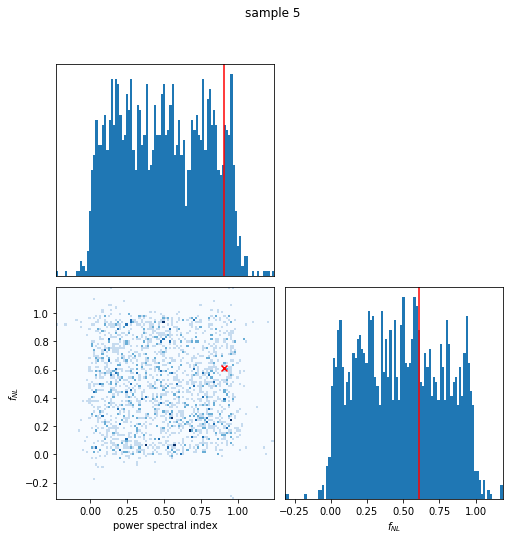

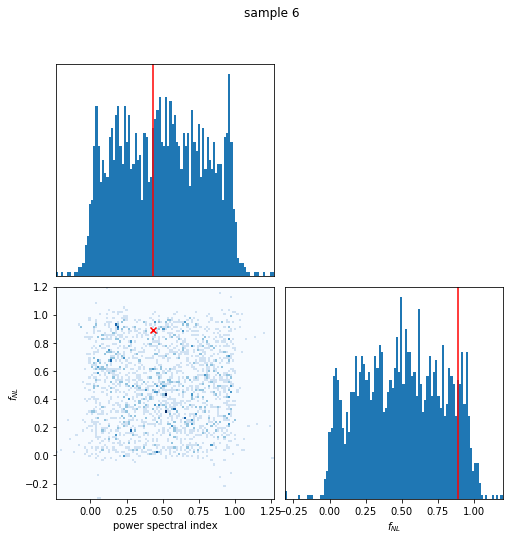

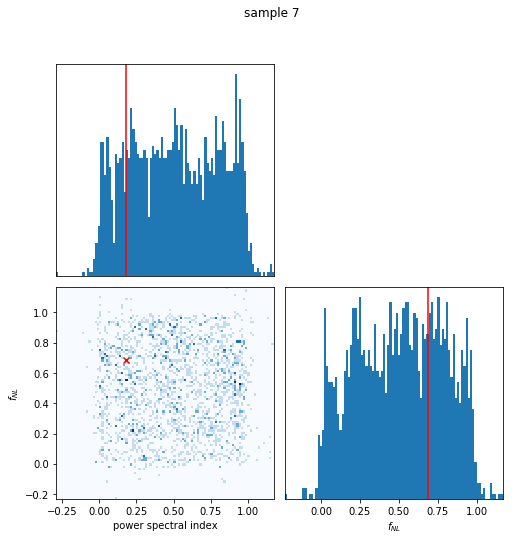

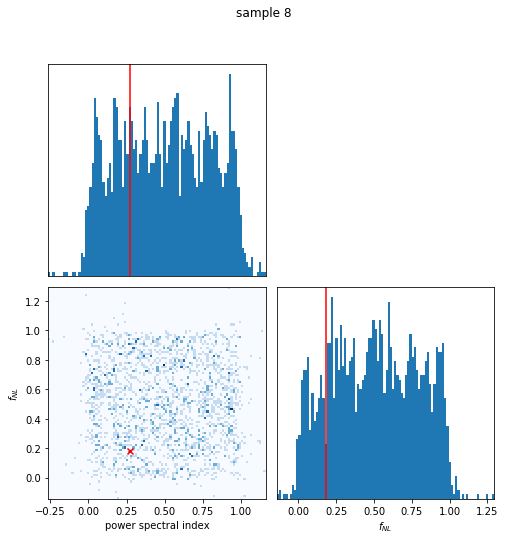

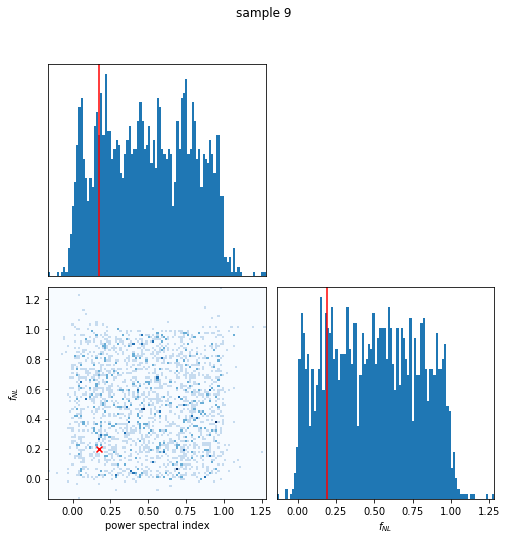

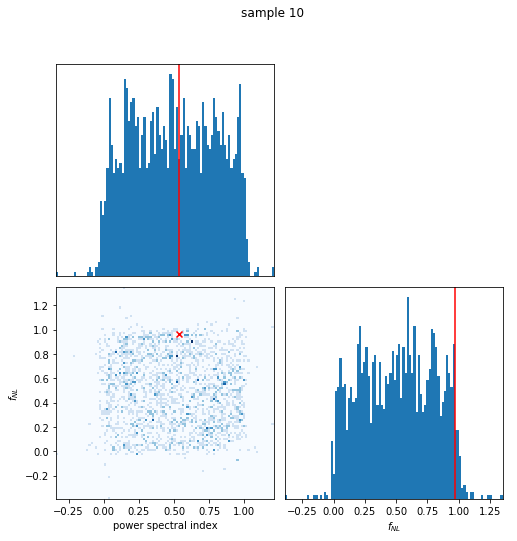

In [14]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


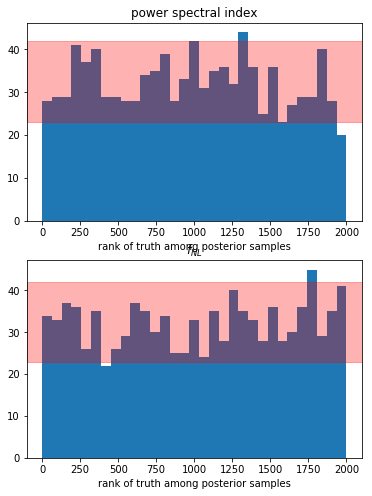

In [28]:
model.plot_ranks(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


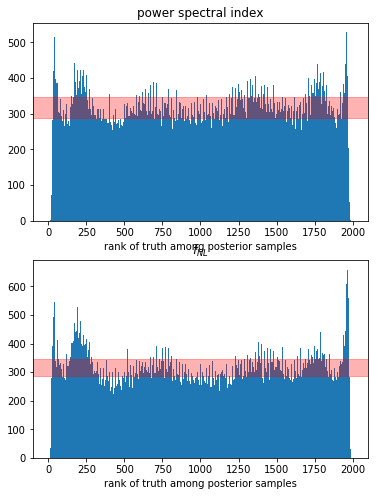

In [29]:
model.plot_ranks(x_train,p_train)

In [11]:
ps_model = LFI(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnlps1')
ps_model.train(training_fn_generator(ps_train,p_train), max_steps=20*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnlps1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aaaf3af9438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Skipping training since max_steps has already saved.


In [14]:
post = ps_model.plot_posteriors(ps_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


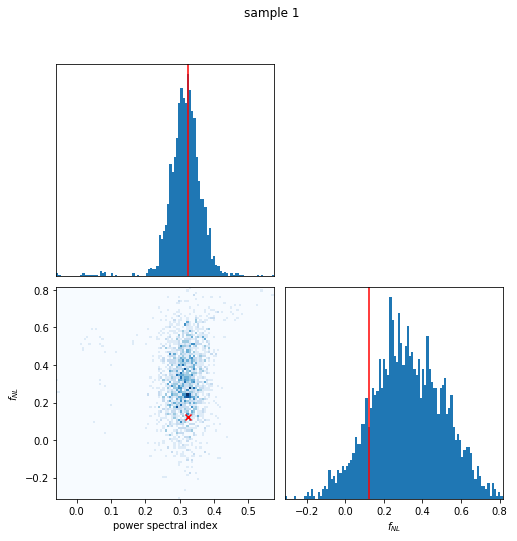

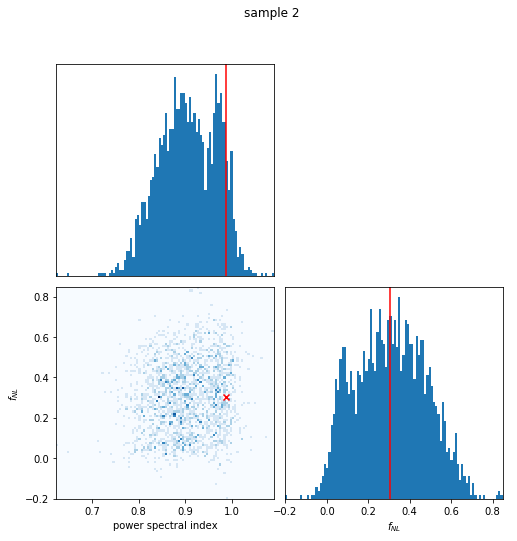

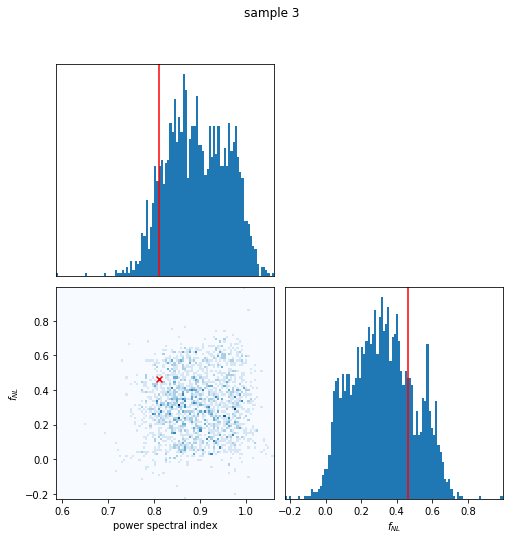

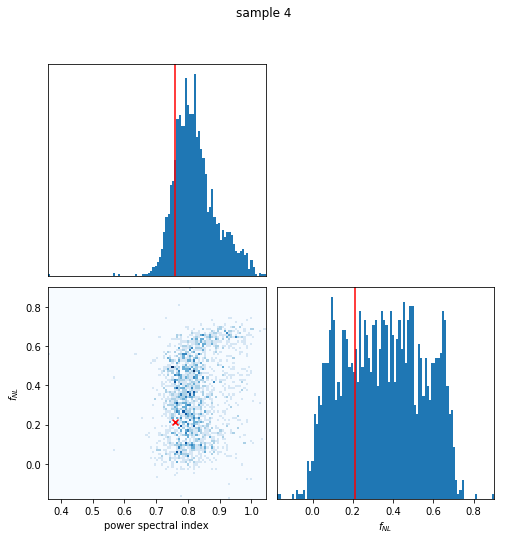

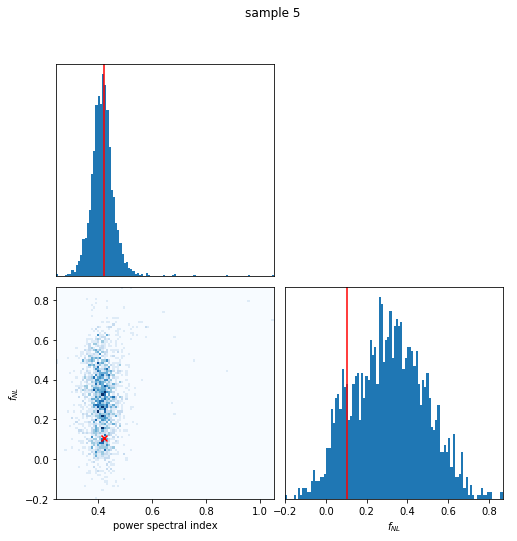

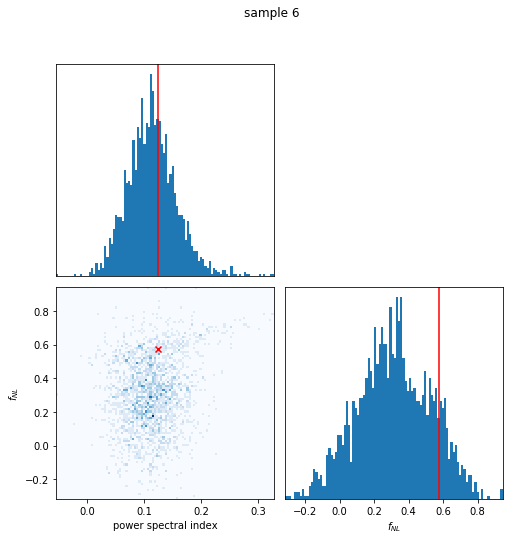

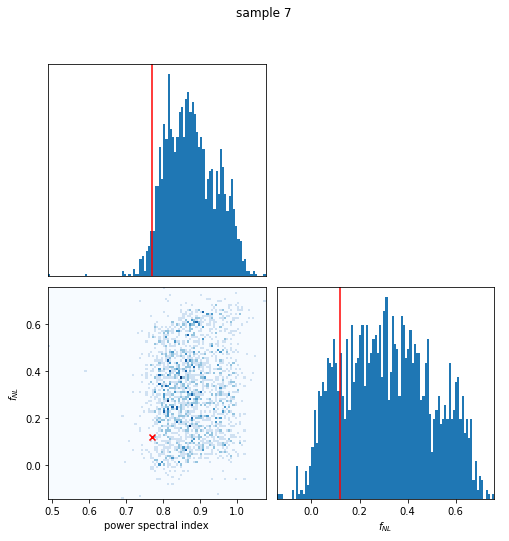

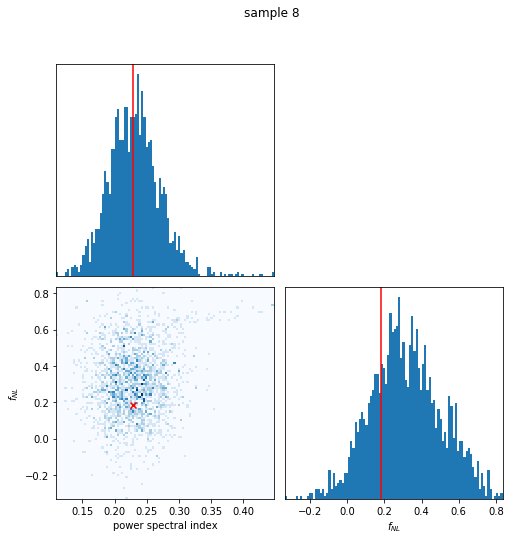

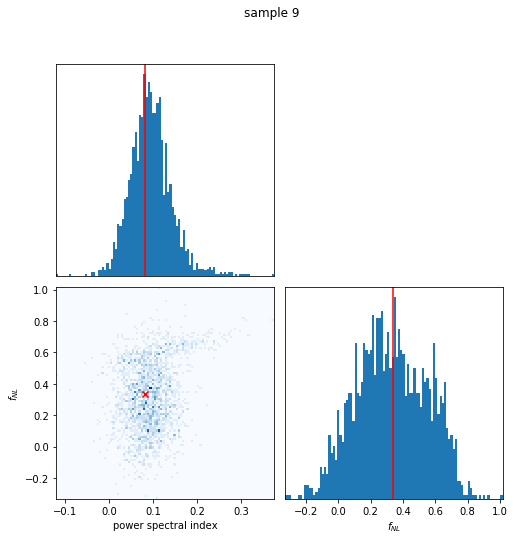

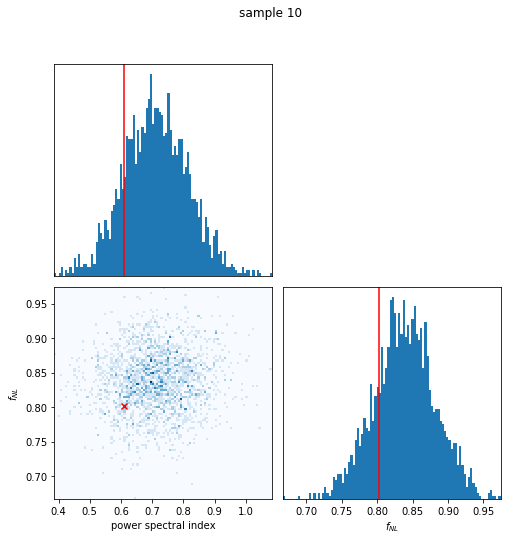

In [15]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


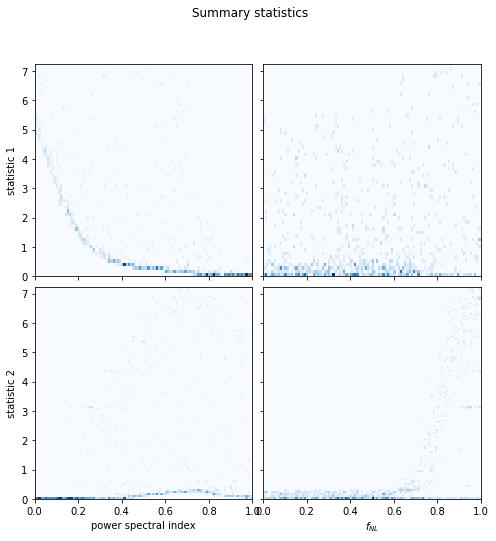

In [21]:
ps_model.plot_summaries(ps_test, p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


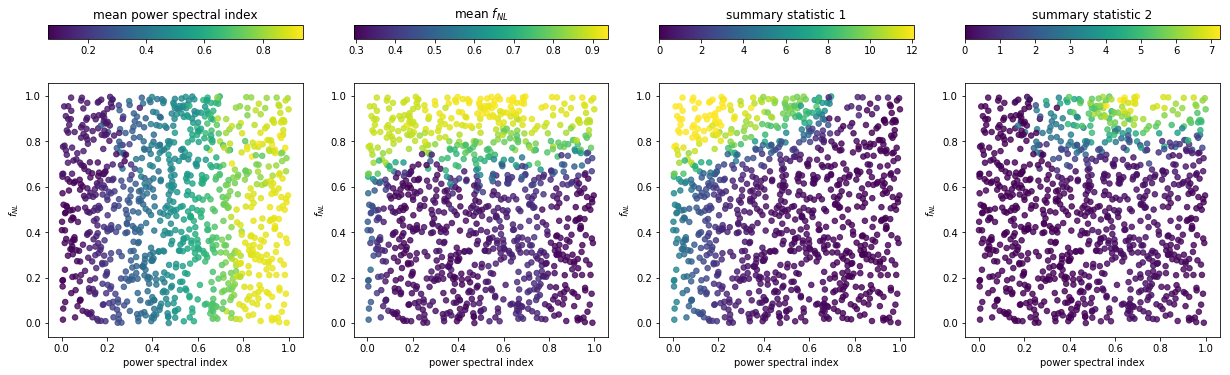

In [12]:
ps_model.plot_2d(ps_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


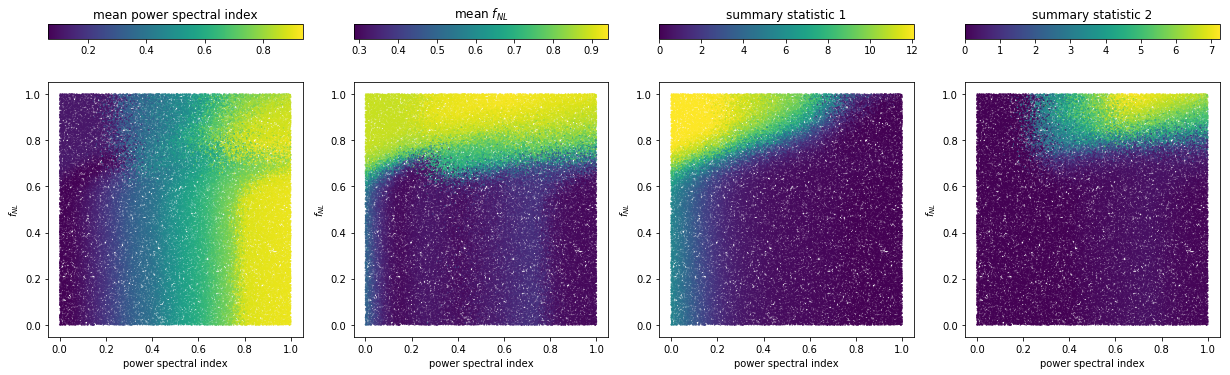

In [13]:
ps_model.plot_2d(ps_train,p_train)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


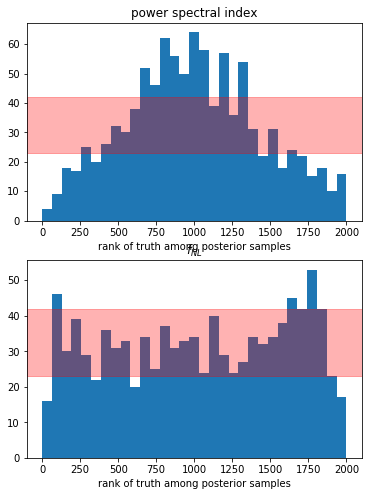

In [23]:
ps_model.plot_ranks(ps_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


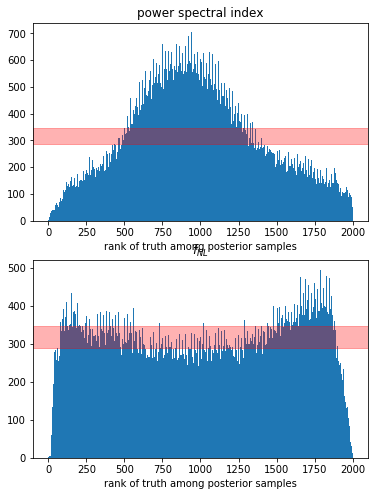

In [24]:
ps_model.plot_ranks(ps_train,p_train)

In [19]:
def pdf(n,spec_ind,min_fnl):
    f_nls = linspace(min_fnl,1,n)
    colours = cm.copper((f_nls-min_fnl)/(1-min_fnl))
    unnorm = fast_gaussian(spectral_index(spec_ind*np.ones(n)), fnl=f_nls)
    norm = standardise_ps(unnorm, lambda x: 1)
    f,ax=subplots(2,1,figsize=(6,10))
    for i in range(n):
        ax[0].plot(*corners(unnorm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
        ax[1].plot(*corners(norm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
    ax[0].legend(frameon=False)
    ax[0].set_title("Original")
    ax[1].set_title("PS standardised")
    

interactive(pdf, n=(2,10),spec_ind=(0.,1),min_fnl=(0,0.7,0.1))

interactive(children=(IntSlider(value=6, description='n', max=10, min=2), FloatSlider(value=0.5, description='…

In [20]:
def pdf(n,spec_ind,min_fnl):
    f_nls = linspace(min_fnl,1,n)
    cmap = cm.copper
    normer =  Normalize(vmin=min_fnl,vmax=1)
    colours = cmap(normer(f_nls))
    unnorm = fast_gaussian(spectral_index(spec_ind*np.ones(n)), fnl=f_nls, constant_phase=True)
    norm = standardise_ps(unnorm, lambda x: 1)
    f,ax=subplots(3,1,figsize=(6,10),gridspec_kw={"height_ratios":(4,4,.5)})
    for i in range(n):
        ax[0].plot(*corners(unnorm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
        ax[1].plot(*corners(norm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
    #ax[0].legend(frameon=False)
    matplotlib.colorbar.ColorbarBase(ax[2],orientation="horizontal",cmap=cmap,norm=normer).set_label("$f_{NL}$")
    ax[0].set_title("Original")
    ax[1].set_title("PS standardised")
    

interactive(pdf, n=(2,11),spec_ind=(0.,1),min_fnl=(0,0.7,0.1))

interactive(children=(IntSlider(value=6, description='n', max=11, min=2), FloatSlider(value=0.5, description='…

In [14]:
bound = max(amax(abs(x_train)),amax(abs(x_test)))
nbins = 32
edges = np.linspace(-bound, bound, nbins+1)
pdf_train = array([np.histogram(x,edges)[0] for x in x_train])
pdf_test = array([np.histogram(x,edges)[0] for x in x_test])

In [15]:
pdf_model = LFI(["pdf"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnlpdf1')
pdf_model.train(training_fn_generator(pdf_train,p_train), max_steps=20*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnlpdf1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aacb20ba0f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Skipping training since max_steps has already saved.


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


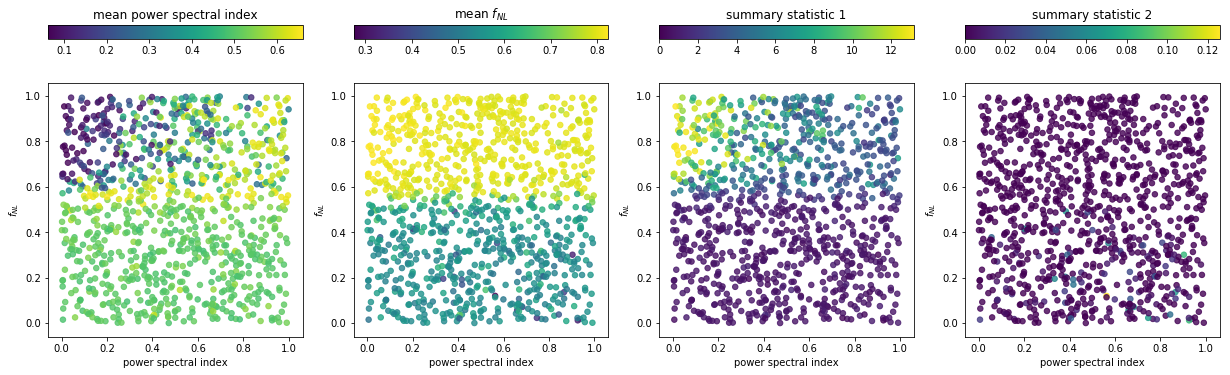

In [16]:
pdf_model.plot_2d(pdf_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


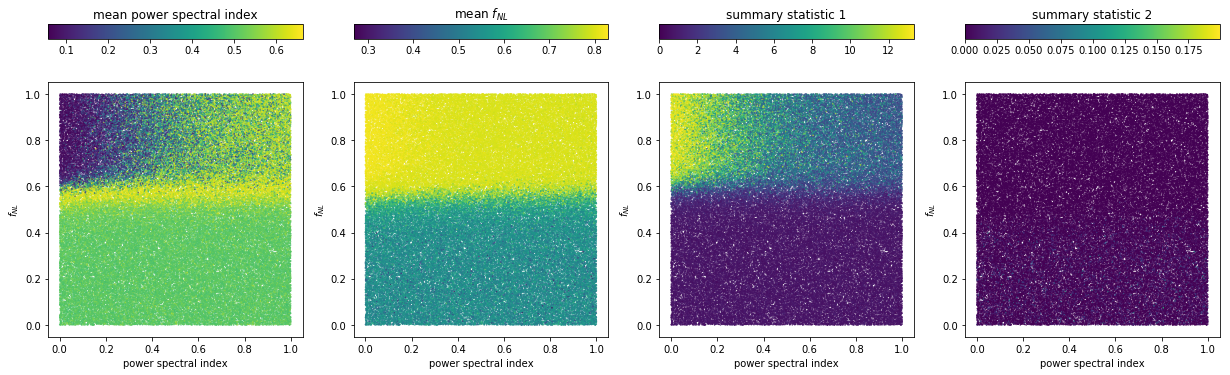

In [21]:
pdf_model.plot_2d(pdf_train,p_train)

In [31]:
post = pdf_model.plot_posteriors(pdf_test, p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


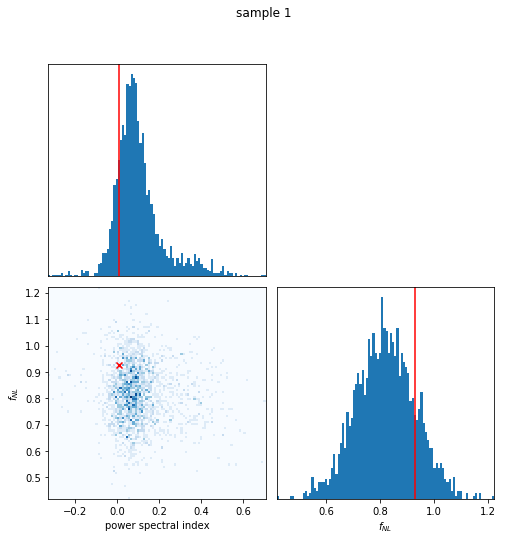

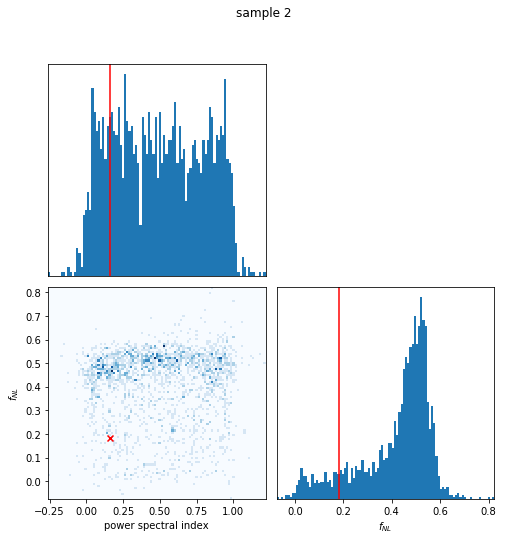

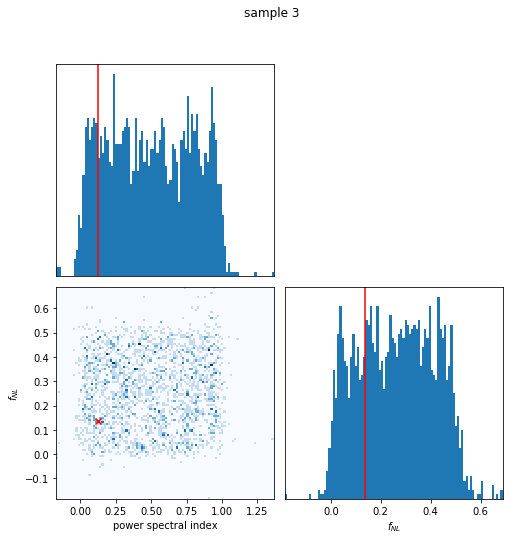

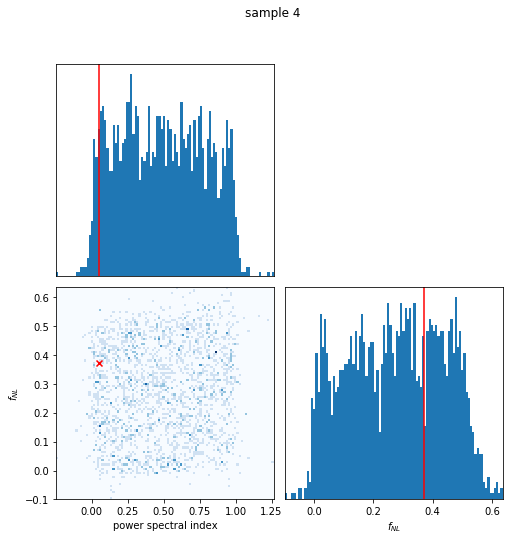

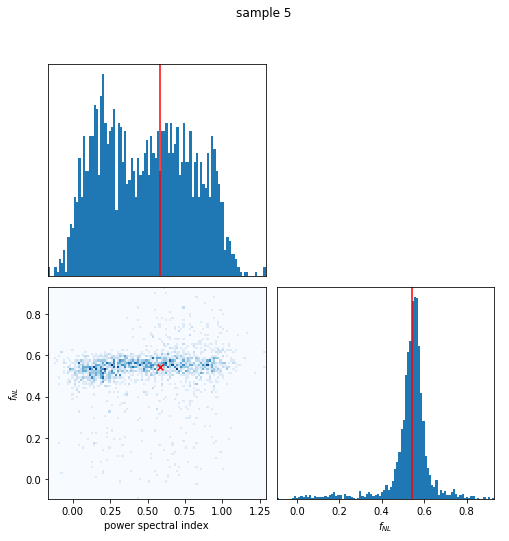

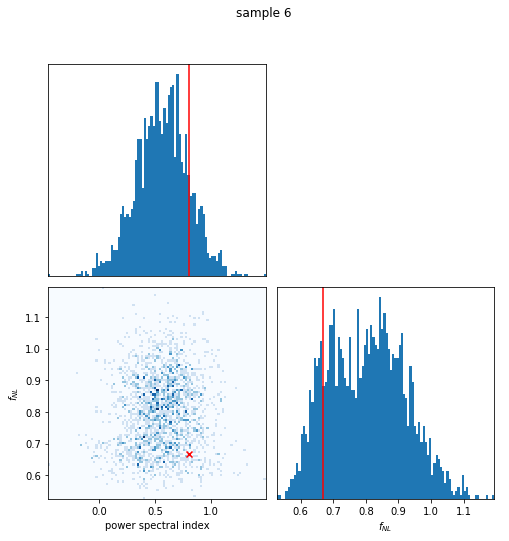

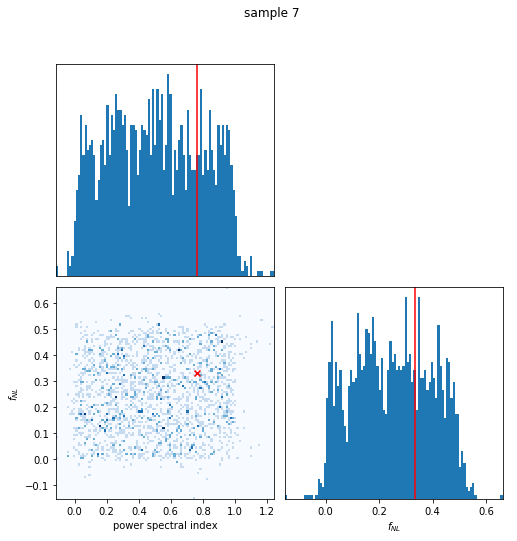

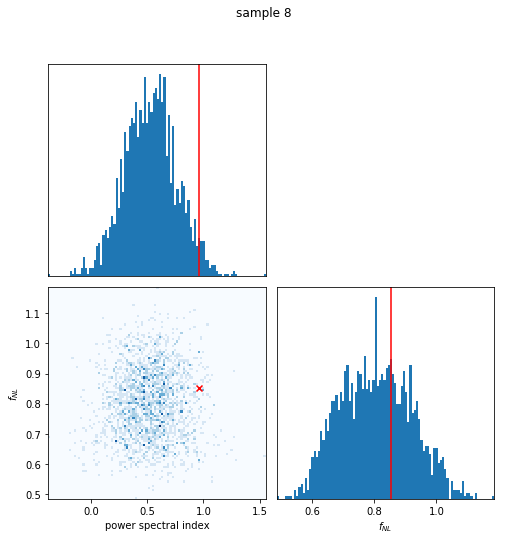

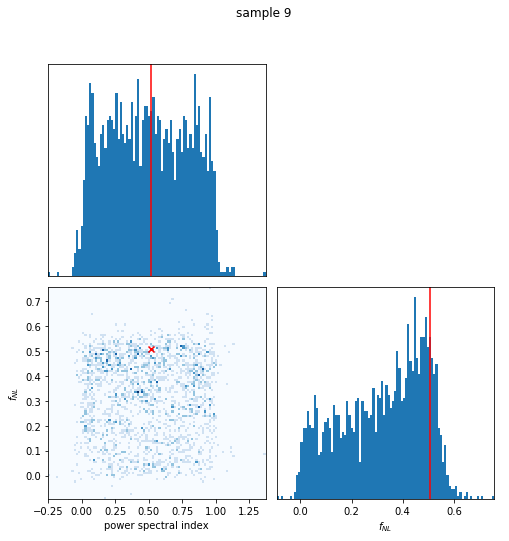

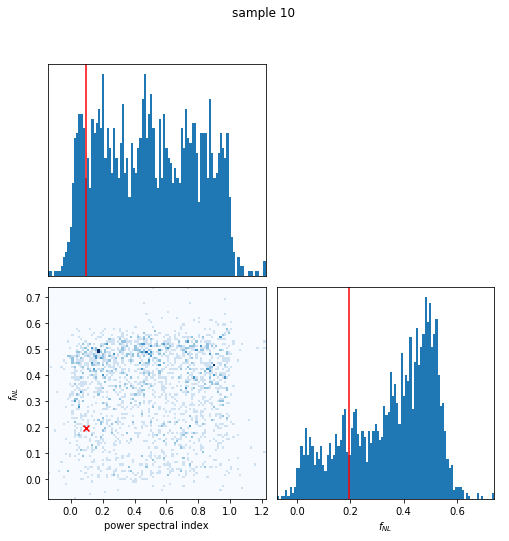

In [32]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


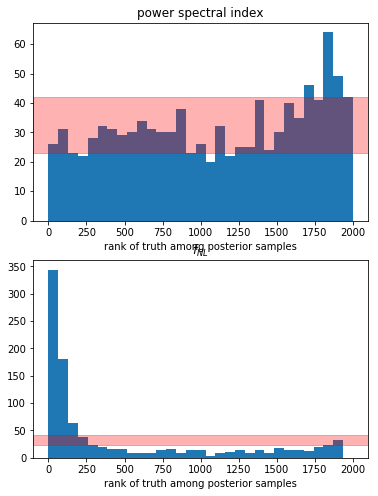

In [25]:
pdf_model.plot_ranks(pdf_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


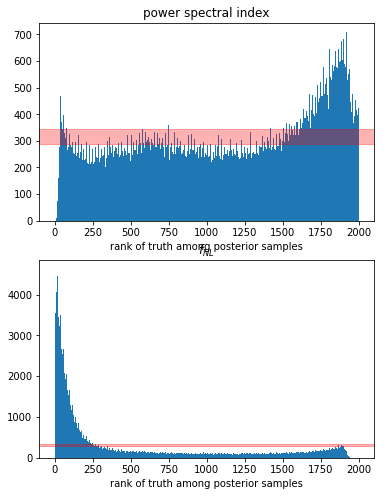

In [26]:
pdf_model.plot_ranks(pdf_train,p_train)

In [26]:
class please_work(LFI):
    def __init__(self,
                feature_columns,
                label_columns,
                n_mixture=10,
                diag=False,
                optimizer=tf.train.AdamOptimizer,
                activation_fn=tf.nn.relu,
                normalizer_fn=tf.contrib.layers.batch_norm,
                dropout=0.2,
                model_dir=None,
                config=None,
                n_samples = 2000,
                model_fn=None,
                cnn=True):
        
        if model_fn is not None:
            return tf.estimator.Estimator.__init__(self,model_fn=model_fn,
                                             model_dir=model_dir,
                                             config=config)

        def _model_fn(features, labels, mode):
            label_dimension = len(label_columns)
            training=mode == tf.estimator.ModeKeys.TRAIN
            # Builds the neural network
            size = features.shape[-1]
            d = len(features.shape)-1
            assert not cnn or 1<=d<=3
            conv = tf.reshape(features,tuple([-1]+[size]*d+[1]))
            channels = 1
            width = size
            if cnn:
                conv_layer = [tf.layers.conv1d, tf.layers.conv2d, tf.layers.conv3d][d-1]
            while width > 1:
                width //= 2
                channels *= 2**d
                channels = min(channels, 512)
                if cnn:
                    conv = conv_layer(conv, channels, 2, strides=2, activation=tf.nn.leaky_relu)
            dense=tf.reshape(conv,(-1,channels))
            f = int(sqrt(label_dimension*channels))
            dense = tf.contrib.layers.fully_connected(tf.layers.dropout(dense,rate=dropout,training=training),f,activation_fn=tf.nn.leaky_relu)
            dense = tf.contrib.layers.fully_connected(tf.layers.dropout(dense,rate=dropout,training=training),f,activation_fn=tf.nn.leaky_relu)
            stat = tf.contrib.layers.fully_connected(tf.layers.dropout(dense,rate=dropout,training=training),label_dimension)
            
            net = tf.contrib.layers.fully_connected(stat, 128, activation_fn=tf.nn.tanh)
            
                # Size of the covariance matrix
            if diag ==True:
                size_sigma = label_dimension
            else:
                size_sigma = (label_dimension *(label_dimension +1) // 2)

            # Create mixture components from network output
            out_mu = tf.contrib.layers.fully_connected(net, label_dimension*n_mixture , activation_fn=None)
            out_mu = tf.reshape(out_mu, (-1, n_mixture, label_dimension))

            out_sigma = tf.contrib.layers.fully_connected(net, size_sigma * n_mixture, activation_fn=None)
            out_sigma = tf.reshape(out_sigma, (-1, n_mixture, size_sigma))

            out_p = tf.contrib.layers.fully_connected(net, n_mixture, activation_fn=None)

            if diag == True:
                sigma_mat = tf.nn.softplus(out_sigma)+1e-4
                gmm = tfp.distributions.MixtureSameFamily(mixture_distribution=tfp.distributions.Categorical(logits=out_p),
                              components_distribution=tfp.distributions.MultivariateNormalDiag(loc=out_mu,
                                                                                scale_diag=sigma_mat))
            else:
                sigma_mat = tfp.distributions.matrix_diag_transform(tfp.distributions.fill_triangular(out_sigma), transform=tf.nn.softplus)
                gmm = tfp.distributions.MixtureSameFamily(mixture_distribution=tfp.distributions.Categorical(logits=out_p),
                             components_distribution=tfp.distributions.MultivariateNormalTriL(loc=out_mu,
                                                                                scale_tril=sigma_mat))

            predictions = {'mu': out_mu, 'sigma': sigma_mat, 'p':out_p, 'stat':stat}

            if mode == tf.estimator.ModeKeys.PREDICT:
                y = gmm.sample(n_samples)
                predictions['samples'] = tf.transpose(y,[1,0,2])

                return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions,
                                                  export_outputs={'pdf': tf.estimator.export.PredictOutput(predictions),
                                                                  'samples': tf.estimator.export.PredictOutput(y),
                                                                  tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: tf.estimator.export.PredictOutput(y)})
            label_layer = labels

            # Compute and register loss function
            loss = - tf.reduce_mean(gmm.log_prob(label_layer),axis=0)
            tf.losses.add_loss(loss)
            total_loss = tf.losses.get_total_loss(add_regularization_losses=True)

            train_op = None
            eval_metric_ops = None

            # Define optimizer
            if mode == tf.estimator.ModeKeys.TRAIN:
                update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
                with tf.control_dependencies(update_ops):
                    train_op = optimizer(learning_rate=0.0002).minimize(loss=total_loss,
                                                global_step=tf.train.get_global_step())
                tf.summary.scalar('loss', loss)
            elif mode == tf.estimator.ModeKeys.EVAL:
                eval_metric_ops = { "log_p": loss}

            return tf.estimator.EstimatorSpec(mode=mode,
                                              predictions=predictions,
                                              loss=total_loss,
                                              train_op=train_op,
                                              eval_metric_ops=eval_metric_ops)

        tf.estimator.Estimator.__init__(self,model_fn=_model_fn,
                                             model_dir=model_dir,
                                             config=config)
        self.labels = label_columns
        self.n_samples = n_samples

model = please_work(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnls5')
batch_size=512
model.train(training_fn_generator(x_train, p_train, batch_size=batch_size), max_steps=50*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnls5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aab75ee52e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.

In [22]:
post = model.plot_posteriors(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls5/model.ckpt-5859
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


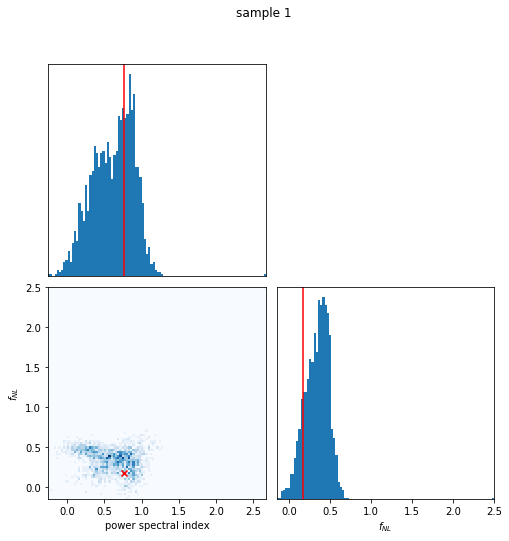

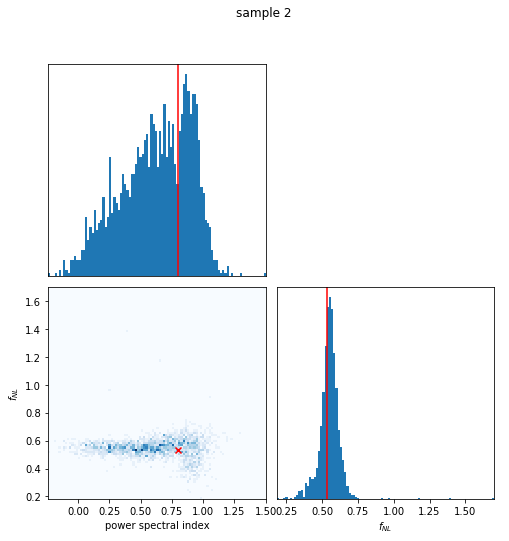

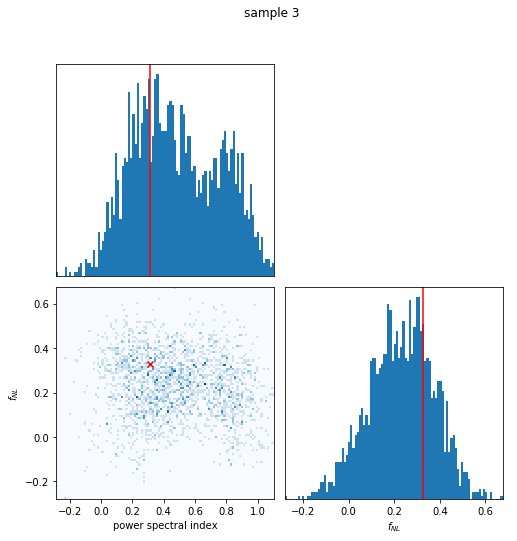

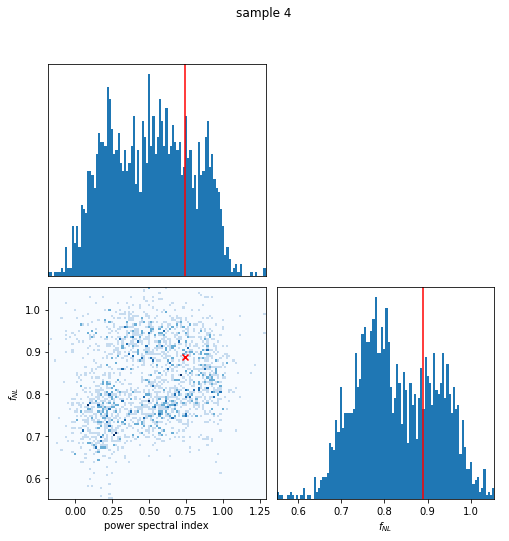

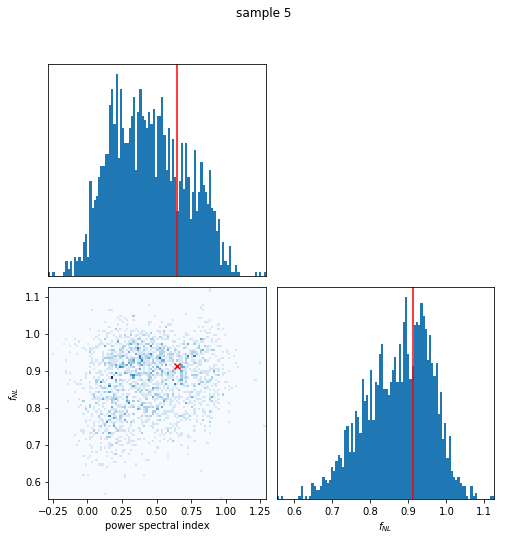

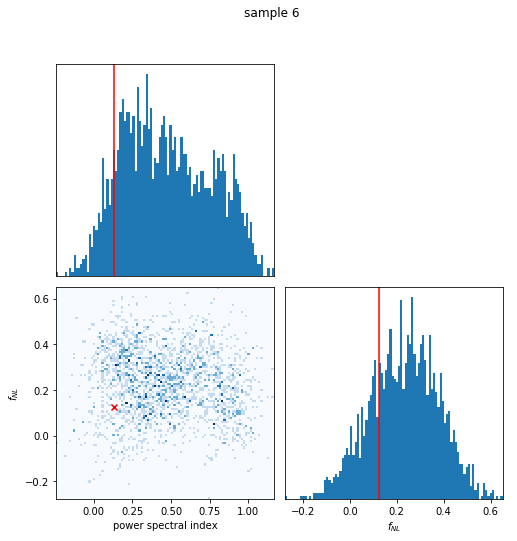

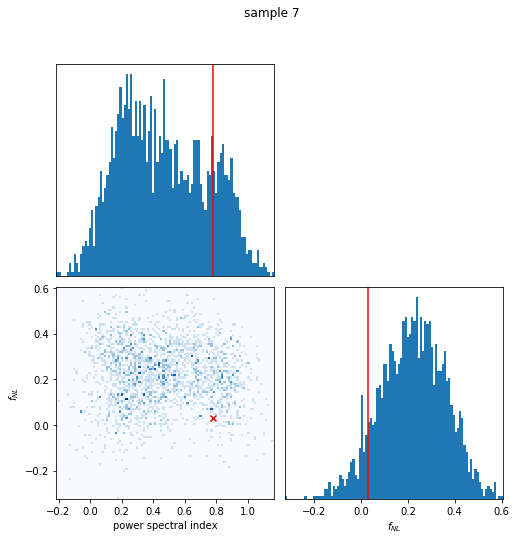

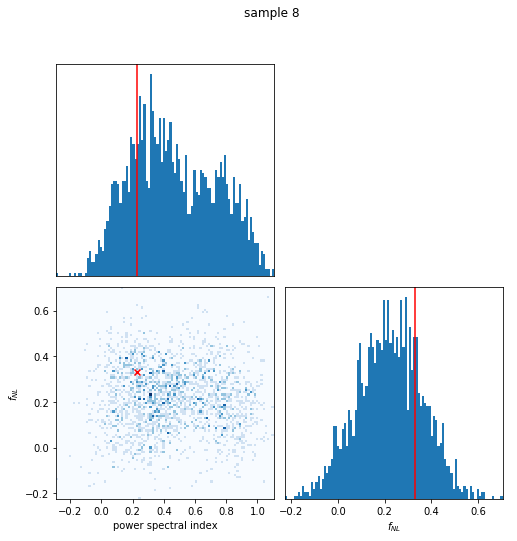

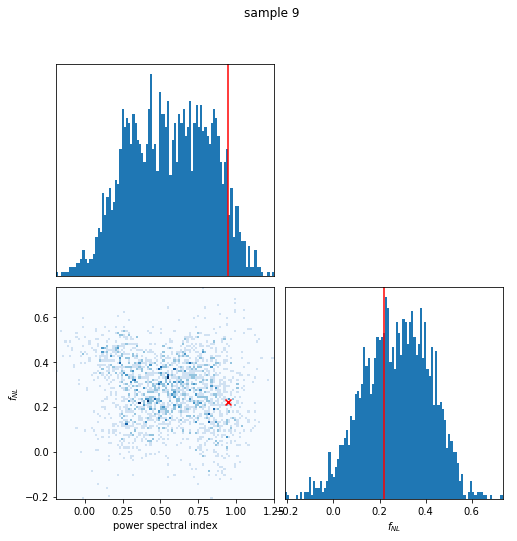

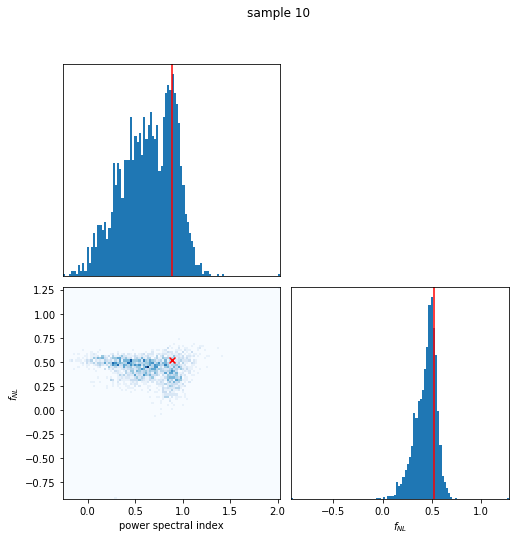

In [23]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls5/model.ckpt-5859
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


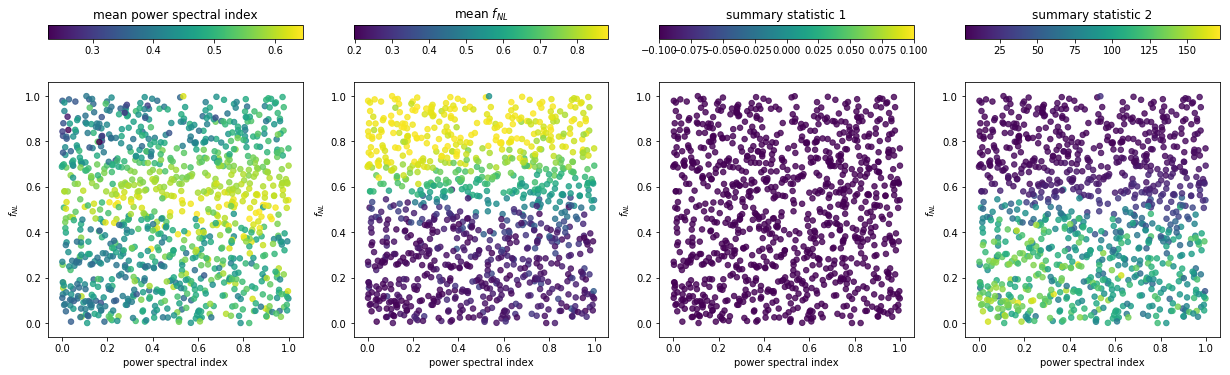

In [24]:
model.plot_2d(x_test, p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls5/model.ckpt-5859
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


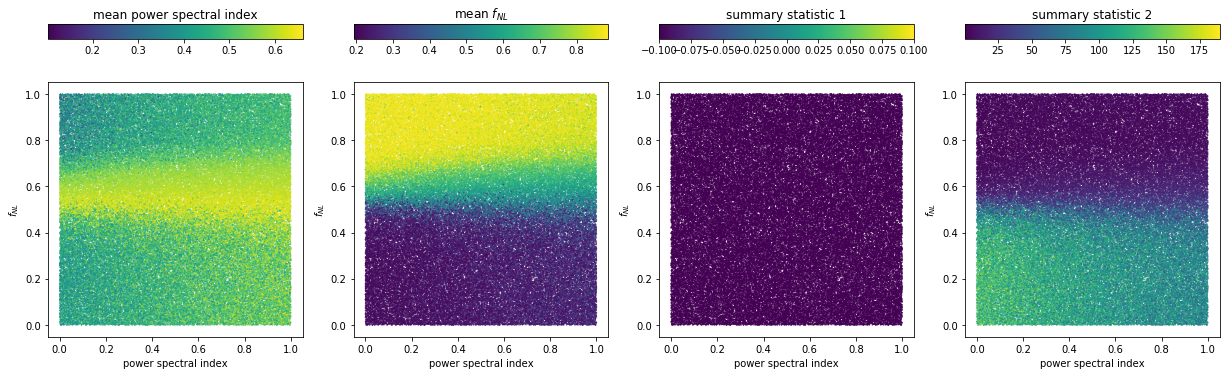

In [25]:
model.plot_2d(x_train, p_train)

In [35]:
class please_also_work(LFI):
    def __init__(self,
                feature_columns,
                label_columns,
                n_mixture=10,
                diag=False,
                optimizer=tf.train.AdamOptimizer,
                activation_fn=tf.nn.relu,
                normalizer_fn=tf.contrib.layers.batch_norm,
                dropout=0.2,
                model_dir=None,
                config=None,
                n_samples = 2000,
                model_fn=None,
                cnn=True):
        
        if model_fn is not None:
            return tf.estimator.Estimator.__init__(self,model_fn=model_fn,
                                             model_dir=model_dir,
                                             config=config)

        def _model_fn(features, labels, mode):
            label_dimension = len(label_columns)
            training=mode == tf.estimator.ModeKeys.TRAIN
            # Builds the neural network
            size = features.shape[-1]
            d = len(features.shape)-1
            assert not cnn or 1<=d<=3
            conv = tf.reshape(features,tuple([-1]+[size]*d+[1]))
            channels = 1
            width = size
            if cnn:
                conv_layer = [tf.layers.conv1d, tf.layers.conv2d, tf.layers.conv3d][d-1]
            while width > 1:
                width //= 2
                channels *= 2**d
                if cnn:
                    conv = conv_layer(conv, channels, 2, strides=2, activation=tf.nn.leaky_relu)
            dense=tf.reshape(conv,(-1,channels))
            f = -int(-(channels/label_dimension)**.2)
            for i in range(3):
                channels //= f
                dense = tf.contrib.layers.fully_connected(tf.layers.dropout(dense,rate=dropout,training=training),channels,activation_fn=tf.nn.leaky_relu)
            channels //= f
            dense = tf.contrib.layers.fully_connected(tf.layers.dropout(dense,rate=dropout,training=training),channels,activation_fn=tf.nn.leaky_relu)
            stat = tf.contrib.layers.fully_connected(tf.layers.dropout(dense,rate=dropout,training=training),label_dimension)
            
            net = tf.contrib.layers.fully_connected(stat, 128, activation_fn=tf.nn.tanh)
            
                # Size of the covariance matrix
            if diag ==True:
                size_sigma = label_dimension
            else:
                size_sigma = (label_dimension *(label_dimension +1) // 2)

            # Create mixture components from network output
            out_mu = tf.contrib.layers.fully_connected(net, label_dimension*n_mixture , activation_fn=None)
            out_mu = tf.reshape(out_mu, (-1, n_mixture, label_dimension))

            out_sigma = tf.contrib.layers.fully_connected(net, size_sigma * n_mixture, activation_fn=None)
            out_sigma = tf.reshape(out_sigma, (-1, n_mixture, size_sigma))

            out_p = tf.contrib.layers.fully_connected(net, n_mixture, activation_fn=None)

            if diag == True:
                sigma_mat = tf.nn.softplus(out_sigma)+1e-4
                gmm = tfp.distributions.MixtureSameFamily(mixture_distribution=tfp.distributions.Categorical(logits=out_p),
                              components_distribution=tfp.distributions.MultivariateNormalDiag(loc=out_mu,
                                                                                scale_diag=sigma_mat))
            else:
                sigma_mat = tfp.distributions.matrix_diag_transform(tfp.distributions.fill_triangular(out_sigma), transform=tf.nn.softplus)
                gmm = tfp.distributions.MixtureSameFamily(mixture_distribution=tfp.distributions.Categorical(logits=out_p),
                             components_distribution=tfp.distributions.MultivariateNormalTriL(loc=out_mu,
                                                                                scale_tril=sigma_mat))

            predictions = {'mu': out_mu, 'sigma': sigma_mat, 'p':out_p, 'stat':stat}

            if mode == tf.estimator.ModeKeys.PREDICT:
                y = gmm.sample(n_samples)
                predictions['samples'] = tf.transpose(y,[1,0,2])

                return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions,
                                                  export_outputs={'pdf': tf.estimator.export.PredictOutput(predictions),
                                                                  'samples': tf.estimator.export.PredictOutput(y),
                                                                  tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: tf.estimator.export.PredictOutput(y)})
            label_layer = labels

            # Compute and register loss function
            loss = - tf.reduce_mean(gmm.log_prob(label_layer),axis=0)
            tf.losses.add_loss(loss)
            total_loss = tf.losses.get_total_loss(add_regularization_losses=True)

            train_op = None
            eval_metric_ops = None

            # Define optimizer
            if mode == tf.estimator.ModeKeys.TRAIN:
                update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
                with tf.control_dependencies(update_ops):
                    train_op = optimizer(learning_rate=0.0002).minimize(loss=total_loss,
                                                global_step=tf.train.get_global_step())
                tf.summary.scalar('loss', loss)
            elif mode == tf.estimator.ModeKeys.EVAL:
                eval_metric_ops = { "log_p": loss}

            return tf.estimator.EstimatorSpec(mode=mode,
                                              predictions=predictions,
                                              loss=total_loss,
                                              train_op=train_op,
                                              eval_metric_ops=eval_metric_ops)

        tf.estimator.Estimator.__init__(self,model_fn=_model_fn,
                                             model_dir=model_dir,
                                             config=config)
        self.labels = label_columns
        self.n_samples = n_samples

model = please_also_work(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnls6')
batch_size=128
model.train(training_fn_generator(x_train, p_train, batch_size=batch_size), max_steps=40*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnls6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aab7545f7f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls6/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


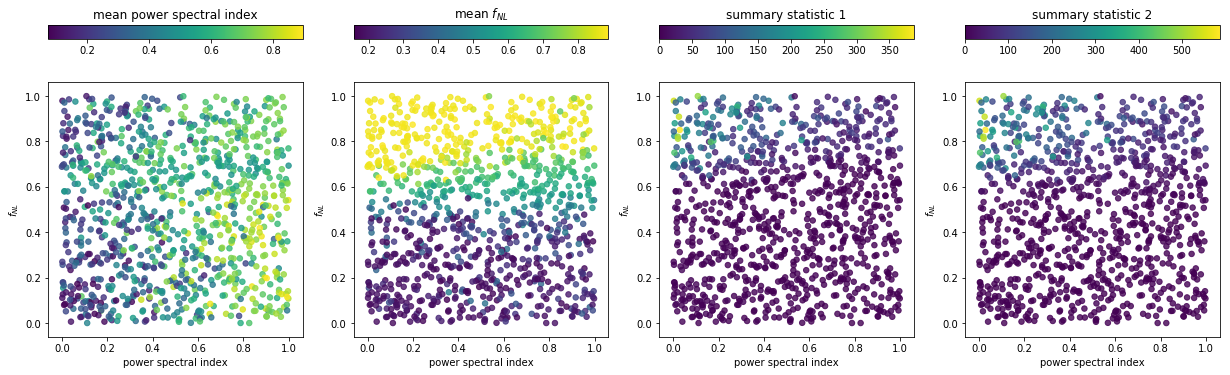

In [36]:
model.plot_2d(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls6/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


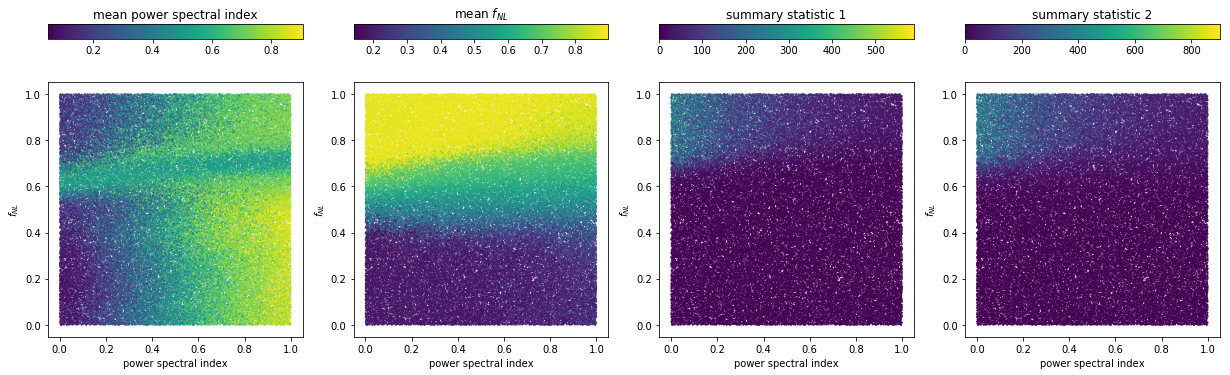

In [37]:
model.plot_2d(x_train,p_train)

In [38]:
post = model.plot_posteriors(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls6/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


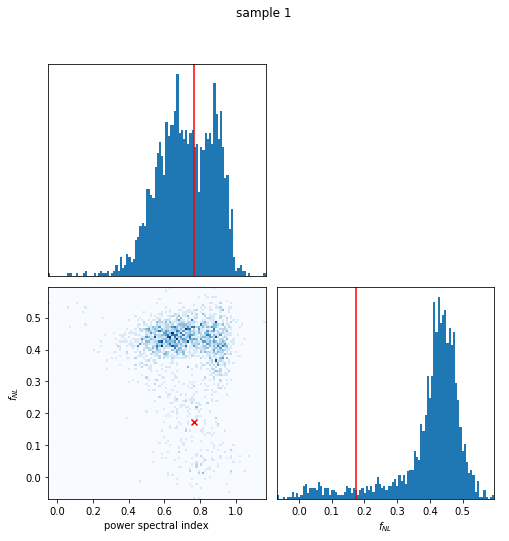

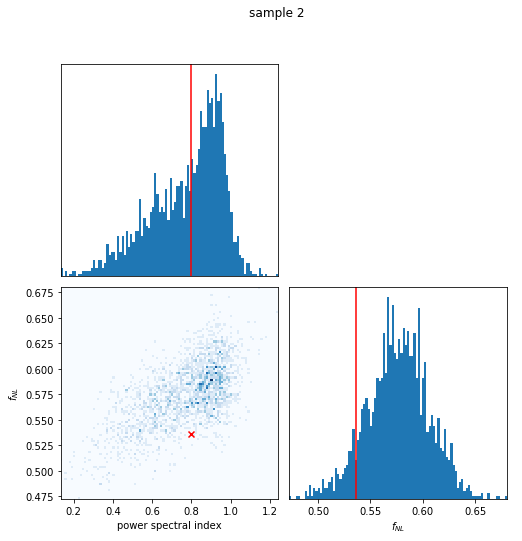

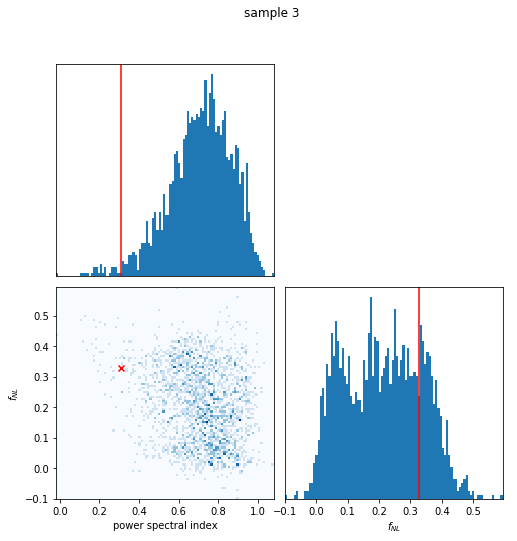

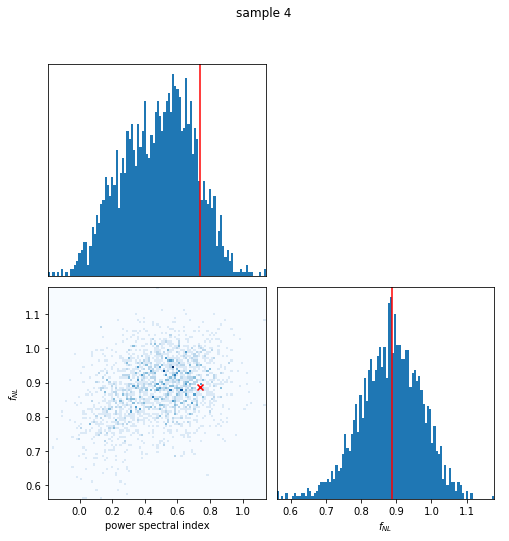

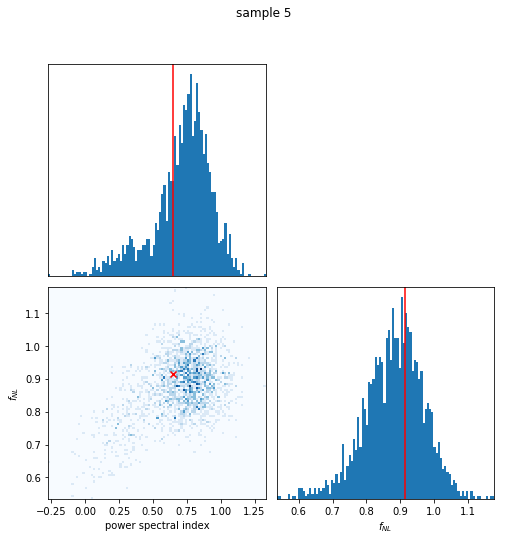

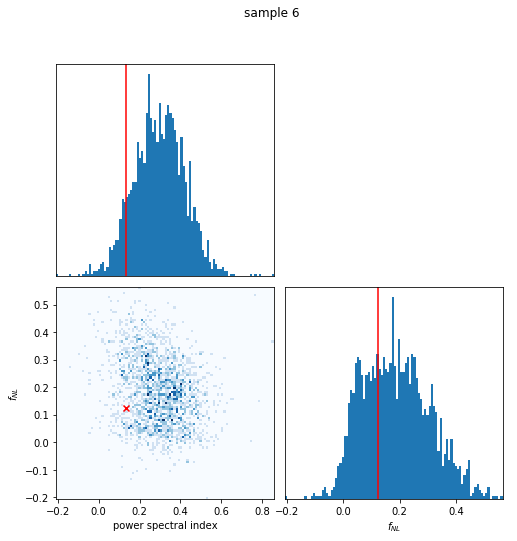

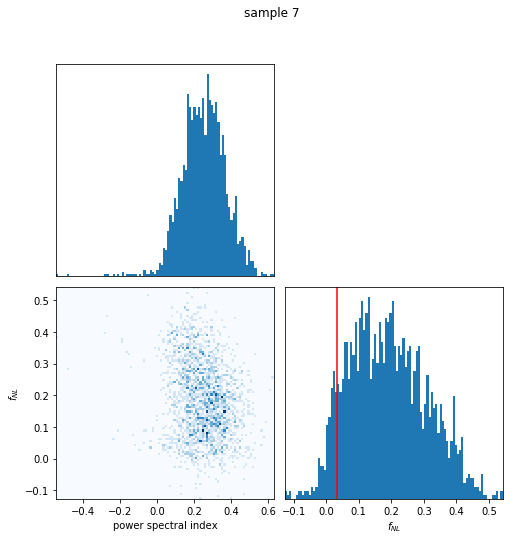

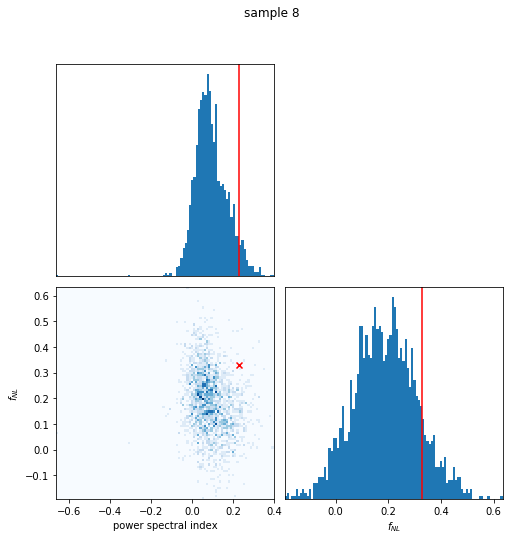

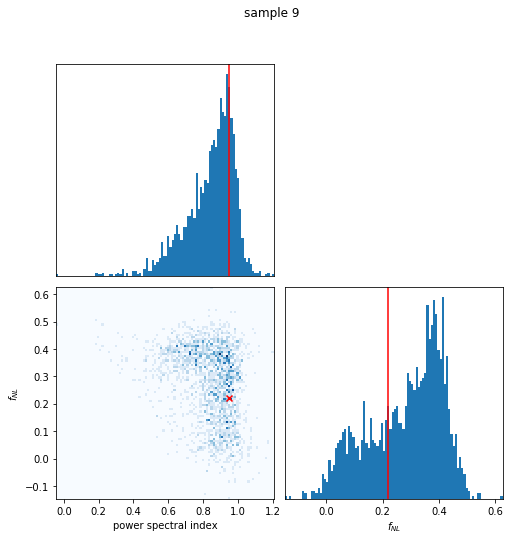

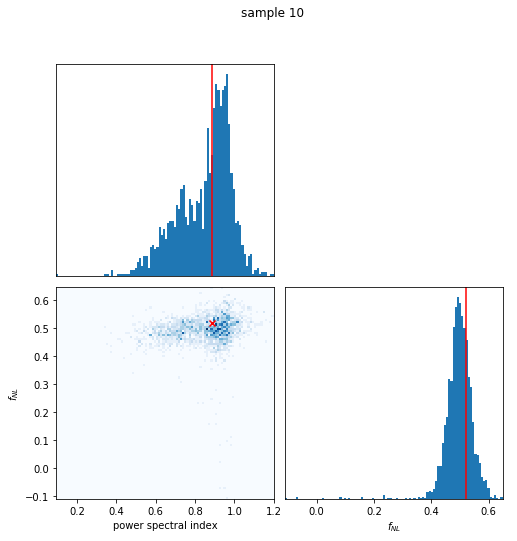

In [39]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls6/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


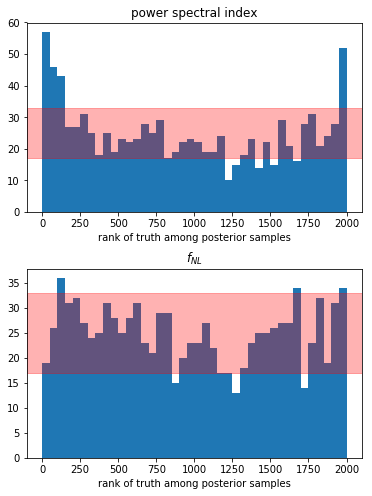

In [40]:
model.plot_ranks(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls6/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


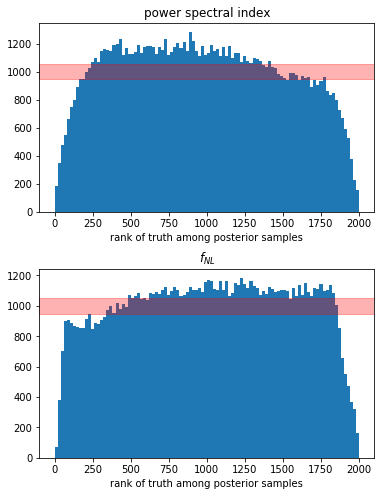

In [42]:
model.plot_ranks(x_train, p_train, nbins=100)